In [130]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [132]:
# loadind the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [133]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [134]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [135]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [136]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [137]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [138]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
train["year"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").year)

In [139]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,year
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1,2011
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1,2011
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1,2011
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1,2011
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308,2012-06-29,20,6,2012
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236,2012-06-29,21,6,2012
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163,2012-06-29,22,6,2012
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48,2012-06-29,23,6,2012


In [140]:
# extracting date, hour and month from the datetime
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
test["year"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").year)

In [141]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month,year
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2012-06-30,1,6,2012
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2012-06-30,2,6,2012
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2012-06-30,3,6,2012
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2012-06-30,4,6,2012
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2012-06-30,5,6,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,11,108,2012-12-31,19,12,2012
4395,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,8,81,2012-12-31,20,12,2012
4396,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60.0,11.0014,7,83,2012-12-31,21,12,2012
4397,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56.0,8.9981,13,48,2012-12-31,22,12,2012


# Univariant and Bivariant Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

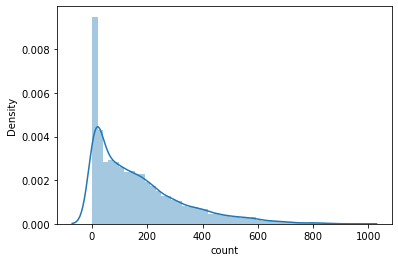

In [142]:
# distribution of count variable
sns.distplot(train["count"])

The distribution is skewed towards right and hence we can take log of the variable and see if the distribution becomes normal.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

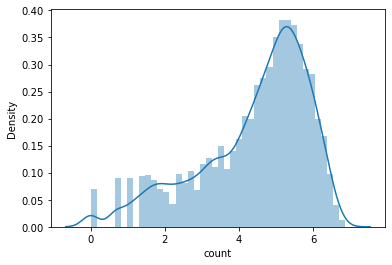

In [143]:
sns.distplot(np.log(train["count"]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

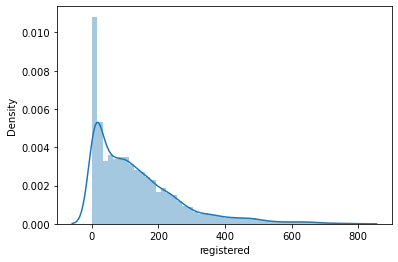

In [144]:
#distribution of registered variable to check the number of registered user rentals initiated.
sns.distplot(train["registered"])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='casual', ylabel='Density'>

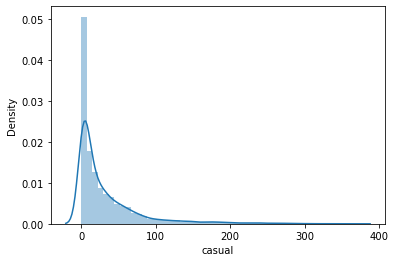

In [145]:
#distribution of registered variable to check the number of casual user rentals initiated.
sns.distplot(train["casual"])

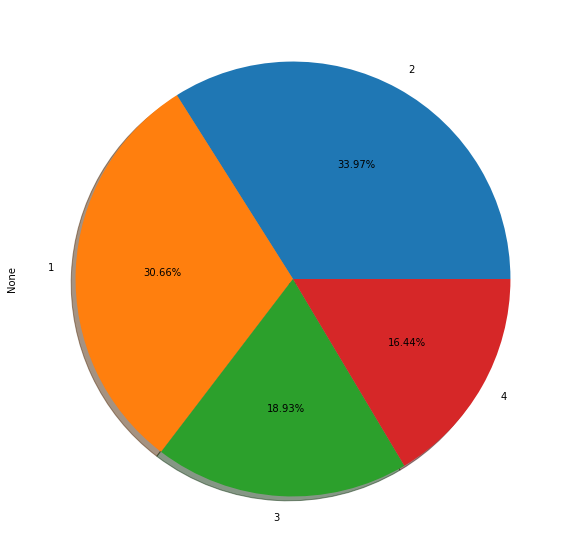

In [146]:
#distribution of each seasons
train.value_counts("season").plot(kind="pie", figsize = (10,10), shadow = True,startangle = 0, autopct = "%1.2f%%")
plt.show()

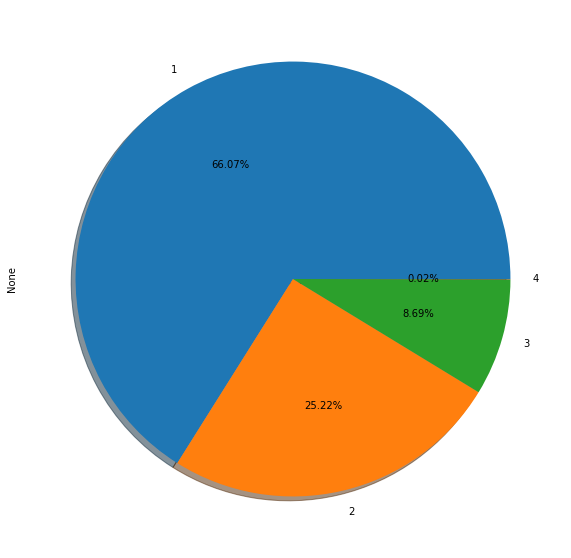

In [147]:
#distribution of each weather
train.value_counts("weather").plot(kind="pie", figsize = (10,10), shadow = True,startangle = 0, autopct = "%1.2f%%")
plt.show()

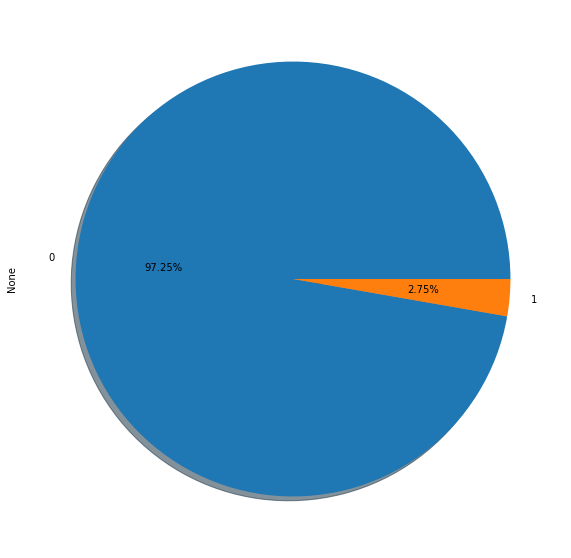

In [148]:
#distribution of each holiday
train.value_counts("holiday").plot(kind="pie", figsize = (10,10), shadow = True,startangle = 0, autopct = "%1.2f%%")
plt.show()

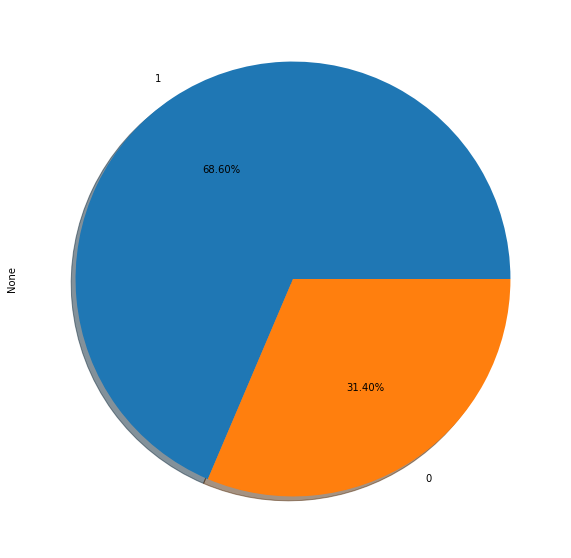

In [149]:
#distribution of each working day
train.value_counts("workingday").plot(kind="pie", figsize = (10,10), shadow = True,startangle = 0, autopct = "%1.2f%%")
plt.show()

<AxesSubplot:>

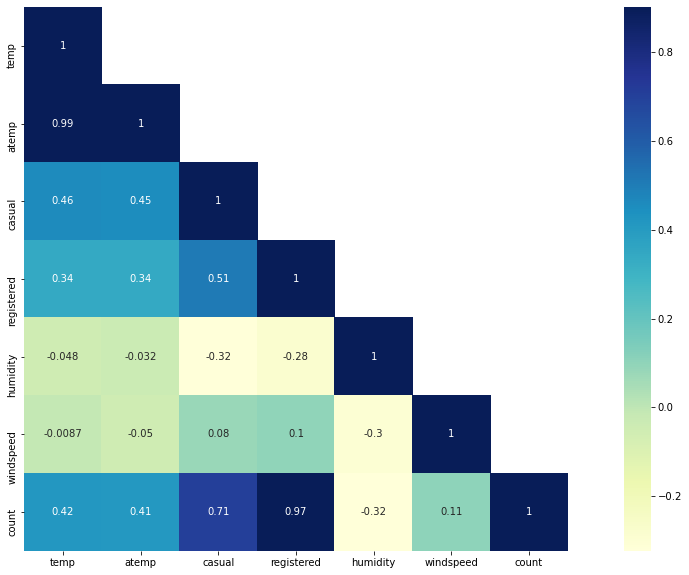

In [150]:
# looking at the correlation between numerical variables
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Some of the inferences from the above correlation map are:

temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".

windspeed will not be really useful numerical feature and it is visible from it correlation value with "count"

Since "atemp" and "temp" has got strong correlation with each other, during model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set

In [151]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

We will drop the datetime, date variable as we have already extracted features from these variables.
We will also drop the atemp variable as we saw that it is highly correlated with the temp variable.

In [152]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

In [153]:
train

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month,year
0,1,0,0,1,9.84,81.0,0.0000,3,13,16,0,1,2011
1,1,0,0,1,9.02,80.0,0.0000,8,32,40,1,1,2011
2,1,0,0,1,9.02,80.0,0.0000,5,27,32,2,1,2011
3,1,0,0,1,9.84,75.0,0.0000,3,10,13,3,1,2011
4,1,0,0,1,9.84,75.0,0.0000,0,1,1,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,3,0,1,1,37.72,42.0,16.9979,53,255,308,20,6,2012
12976,3,0,1,2,35.26,53.0,12.9980,41,195,236,21,6,2012
12977,3,0,1,3,33.62,63.0,12.9980,34,129,163,22,6,2012
12978,3,0,1,3,33.62,63.0,12.9980,6,42,48,23,6,2012


# Model Creation

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [154]:
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

In [155]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 12), (10774,), (2206, 12), (2206,))

In [156]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=5)
# defining a decision tree model with a depth of 5.
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [157]:
predict = dt_reg.predict(X_val)
predict

array([3.41871062, 1.8467692 , 1.8467692 , ..., 5.11768502, 3.82939259,
       4.20971721])

In [158]:
#accuracy of model creation
dt_reg.score(X_train, y_train)

0.9912742918967281

In [159]:
#accuracy on prediction
dt_reg.score(X_val, y_val)

0.9854646402253987

we getting the 98.5% of accuracy on validation data set.

In [160]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [161]:
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.17102267399446983

The rmsle value has decreased to 0.171. This is a decent score. Let's now make predictions for the test dataset which you can submit in the excel sheet provided to you to generate your score

In [162]:
test_prediction = dt_reg.predict(test)
test_prediction

array([4.20971721, 4.20971721, 3.10092477, ..., 4.54557822, 4.07653276,
       4.07653276])

These are the log values and we have to convert them back to the original scale.

In [163]:
final_prediction = np.exp(test_prediction)
final_prediction

array([67.33749501, 67.33749501, 22.21848887, ..., 94.21488861,
       58.94075343, 58.94075343])

In [164]:
submission = pd.DataFrame()

In [165]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [166]:
submission.to_csv('submission.csv', header=True, index=False)